<a href="https://colab.research.google.com/github/YonggunJung/ICT_TensorFlow/blob/main/20230921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as img

(429, 640, 3)
(1, 429, 640, 3)
(1, 429, 640, 1)
(3, 3, 1, 1)
(1, 427, 638, 1)
(427, 638, 1)


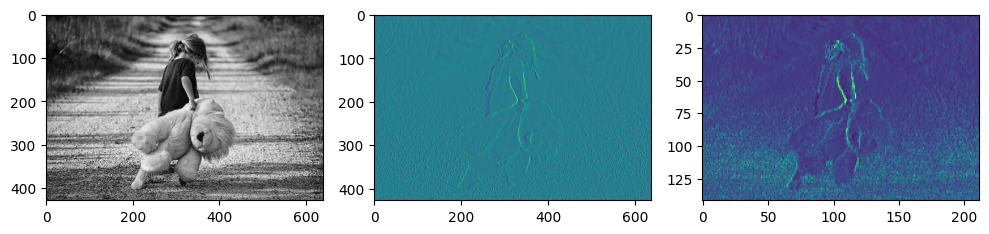

In [16]:
# Convolution 연산의 결과를 눈으로 확인 (특징 추출)

fig = plt.figure(figsize = (10, 10)) # 10 inch

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ori_image = img.imread('/content/drive/MyDrive/Colab Notebooks/ICT Innovation Square/image/teddy.jpg')
ax1.imshow(ori_image)

print(ori_image.shape) # (429, 640, 3)  3차원 (세로, 가로, pixel수)

# convolution 처리(특징추출)
# 입력형태로 먼저 만들기 4차원으로 입력 해야함
# (이미지 갯수, 세로, 가로, 채널(컬러))
# (1, 429, 640, 3) <= 이렇게 만들기

input_image = ori_image.reshape((1, ) + ori_image.shape) # 차원 추가
print(input_image.shape) # (1, 429, 640, 3) 만듦

input_image = input_image.astype(np.float32) # 정수를 실수로 변환

# 흑백 이미지 이기 때문에 RGB값이 같다 조금 쉽게 이해하기 위해
# channel은 1channel로 사용
channel1_input_image = input_image[:, :, :, 0:1] # slicing을 통해서 1channel만 가져오기

print(channel1_input_image.shape) # (1, 429, 640, 1)

# filter 필요
# (filter height, filter width, filter channel, filter의 갯수)
# (3, 3, 1, 1)  <- 이렇게 만들기
weight = np.array([[[[-1]], [[0]], [[1]]],
                  [[[-1]], [[0]], [[1]]],
                  [[[-1]], [[0]], [[1]]],]) # (3, 3, 1, 1)

print(weight.shape)

# convolution 연산 수행
cov2d = tf.nn.conv2d(channel1_input_image, weight, strides = [1, 1, 1, 1], padding = 'VALID')
cov2d_numpy = cov2d.numpy()
print(cov2d_numpy.shape) # (1, 427, 638, 1)

t_img = cov2d_numpy[0, :, :, :]
print(t_img.shape) #(427, 638, 1)

ax2.imshow(t_img)

# Pooling 처리 (사이즈 축소, 전체 볼륨 조절)
pool_result = tf.nn.max_pool(cov2d, ksize=[1, 3, 3, 1], strides = [1, 3, 3, 1], padding = 'VALID').numpy()
pool_img = pool_result[0, :, :, :]

ax3.imshow(pool_img)

fig.tight_layout()
plt.show()